#### <p style="text-align:center;"> 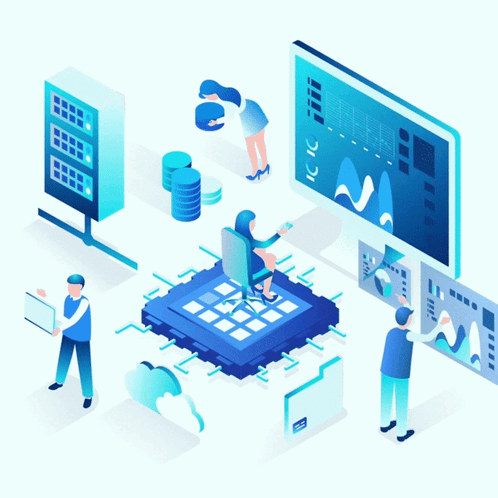 </p>
# <p style="text-align:center;"> Data Science </p>
# <p style="text-align:center;"> Track Code:DS </p>
# <p style="text-align:center;"> Task Code:01 </p>

## Data Visualization with Bar Chart & Histogram
## Dataset: Titanic

## Since World bank dataset does not inculdes Age & Gender column hence I have consider this dataset to meet task requirements

### Loaded the Titanic Dataset using Seaborn & understanding the dataset if null or missing values etc

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Display the first 5 rows to understand the data
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [41]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [43]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [74]:
titanic.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [47]:
titanic.duplicated().sum()

107

In [49]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
#Missing age filled with Median (Robust to Outliers)
titanic['age'].fillna(titanic['age'].median(), inplace=True)

In [ ]:
#For deck (High Missingness) - Created a "Missing" Category
# Step 1: Add 'Unknown' to the categories
titanic['deck'] = titanic['deck'].cat.add_categories(['Unknown'])

# Step 2: Fill NaN with 'Unknown'
titanic['deck'].fillna('Unknown', inplace=True)

In [ ]:
#For embarked and embark_town (Categorical Columns)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

In [65]:
titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### Bar Chart for Gender (Categorical Variable)
### Objective: Visualizing the distribution of passenger genders (sex column).

C:\Users\priya\AppData\Local\Temp\ipykernel_19392\2162447548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic, x='sex', palette='deep')


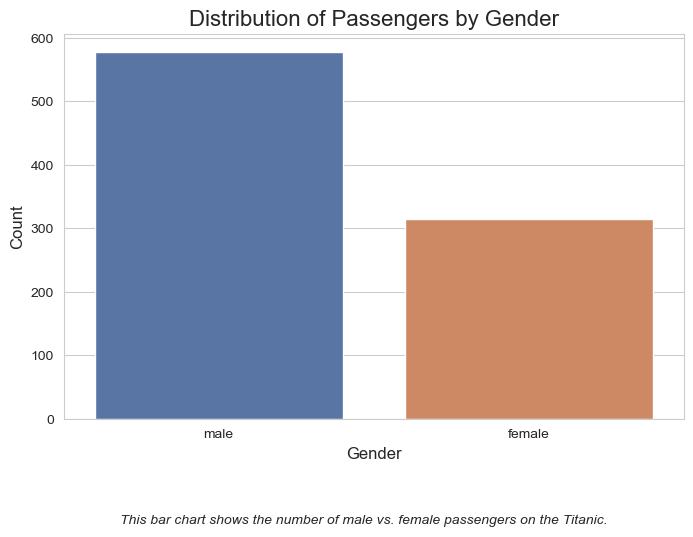

Gender Distribution (%):
sex
male      64.76
female    35.24
Name: proportion, dtype: float64


In [101]:
# Create a bar chart for 'sex' (categorical variable)
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic, x='sex', palette='deep')
plt.title('Distribution of Passengers by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.figtext(0.5, -0.1, 'This bar chart shows the number of male vs. female passengers on the Titanic.', 
            ha='center', fontsize=10, style='italic')
plt.show()
# Displayed gender counts as percentages
gender_counts = titanic['sex'].value_counts(normalize=True) * 100
print("Gender Distribution (%):")
print(gender_counts.round(2))

#### Histogram for Age (Continuous Variable)
#### Objective: Visualize the distribution of passenger ages (age column)


Age Statistics:
count    714.00
mean      29.70
std       14.53
min        0.42
25%       20.12
50%       28.00
75%       38.00
max       80.00
Name: age, dtype: float64


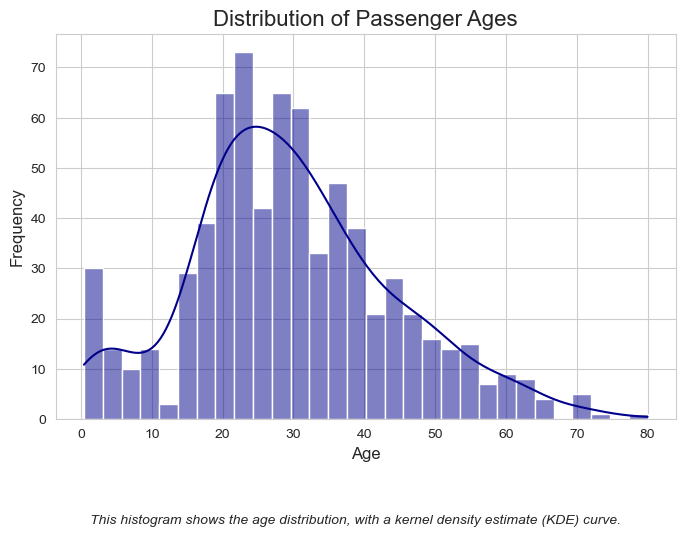

In [99]:
# Create a histogram for 'age' (continuous variable)
plt.figure(figsize=(8, 5))
sns.histplot(titanic['age'].dropna(), bins=30, kde=True, color='darkblue')
plt.title('Distribution of Passenger Ages', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.figtext(0.5, -0.1, 'This histogram shows the age distribution, with a kernel density estimate (KDE) curve.', 
            ha='center', fontsize=10, style='italic')
# Display basic age statistics
age_stats = titanic['age'].describe()
print("\nAge Statistics:")
print(age_stats.round(2))

#### Age Distribution by Gender

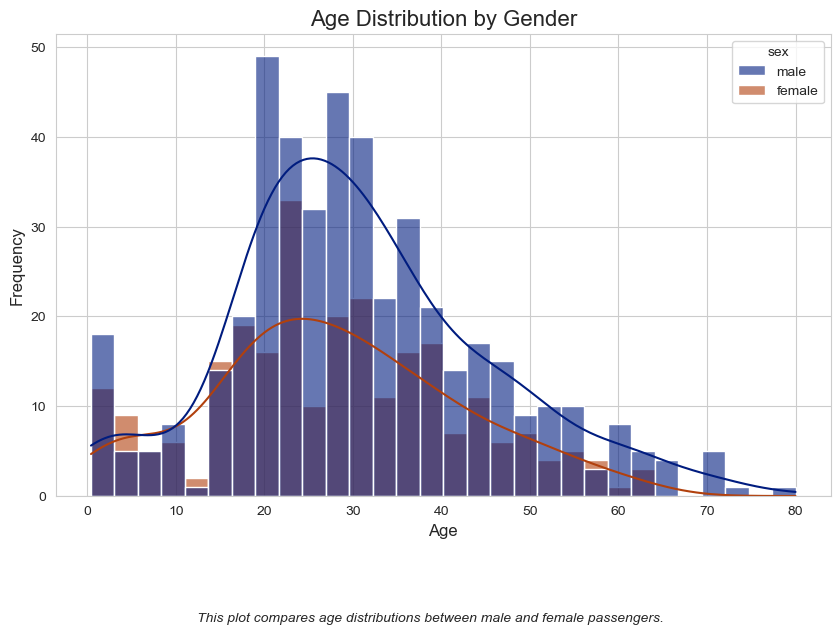

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='age', hue='sex', bins=30, kde=True, palette='dark', alpha=0.6)
plt.title('Age Distribution by Gender', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.figtext(0.5, -0.1, 'This plot compares age distributions between male and female passengers.', 
            ha='center', fontsize=10, style='italic')
plt.show()

#### Conclusion
#### In this task, I analyzed the Titanic dataset using Seaborn to visualize key demographic distributions. A bar chart revealed a gender imbalance, with 64.76% male and 35.24% female passengers. A histogram showed that passenger ages were mostly between 20–40 years, with a mean of 29.70, though 177 age values (19.87%) were missing, potentially affecting the distribution. A bonus plot comparing age by gender confirmed similar age trends across sexes, with males consistently more frequent. These visualizations effectively highlight the dataset’s gender and age composition, providing clear insights into passenger demographics.

#### This conclusion is succinct, directly tied to the visualizations, and includes all key findings, including the impact of missing data.